In [15]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
 
import pandas as pd
import numpy as np
# Only needed if you want to display your plots inline if using Notebook
%matplotlib inline

In [2]:
# import some data to play with
iris = datasets.load_iris()

In [6]:
#iris.data
#iris.feature_names
iris.target
#iris.target_names

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
# Store the inputs as a Pandas Dataframe and set the column names
x = pd.DataFrame(iris.data)
x.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
 
y = pd.DataFrame(iris.target)
y.columns = ['Targets']

In [13]:
x.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Visualizing the data
It is always important to have a look at the data. We will do this by plotting two scatter plots. One looking at the Sepal values and another looking at Petal. We will also set it to use some colours so it is clearer.


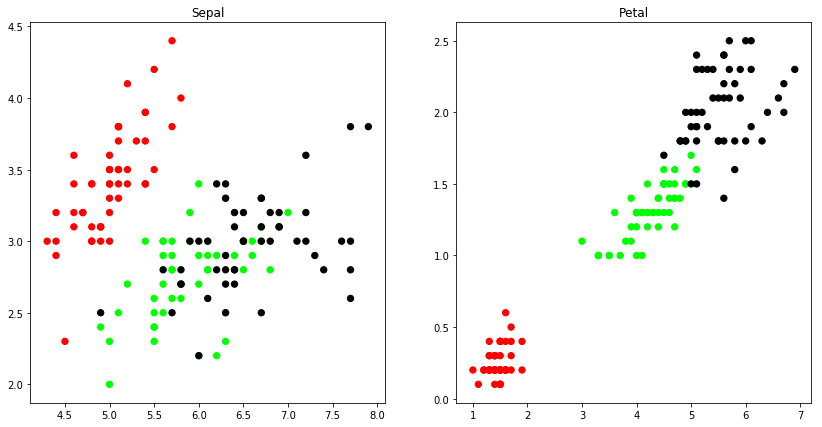

In [16]:
# Set the size of the plot
plt.figure(figsize=(14,7))
 
# Create a colormap
colormap = np.array(['red', 'lime', 'black'])
 
# Plot Sepal
plt.subplot(1, 2, 1)
plt.scatter(x.Sepal_Length, x.Sepal_Width, c=colormap[y.Targets], s=40)
plt.title('Sepal')
 
plt.subplot(1, 2, 2)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Petal')

# Build the K Means Model

This is the easy part, providing you have the data in the correct format (which we do). Here we only need two lines. First we create the model and specify the number of clusters the model should find (n_clusters=3) next we fit the model to the data.

In [17]:
# K Means Cluster
model = KMeans(n_clusters=3)
model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [18]:
# This is what KMeans thought
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

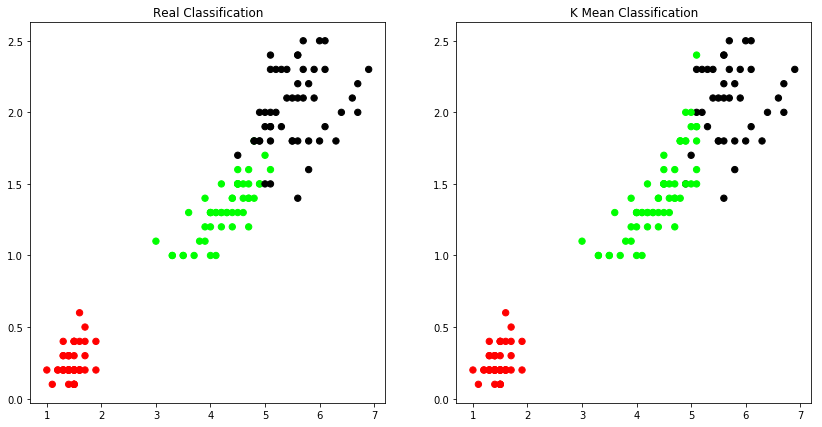

In [20]:
# View the results
# Set the size of the plot
plt.figure(figsize=(14,7))
 
# Create a colormap
colormap = np.array(['red', 'lime', 'black'])
 
# Plot the Original Classifications
plt.subplot(1, 2, 1)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Classification')
 
# Plot the Models Classifications
plt.subplot(1, 2, 2)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[model.labels_], s=40)
plt.title('K Mean Classification')

In [22]:
# Performance Metrics
sm.accuracy_score(y, model.labels_)

0.89333333333333331